In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.shape

(150, 4)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df_scaled= scaler.fit_transform(df)
df_scaled= pd.DataFrame(df_scaled, columns= df.columns)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [11]:
df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


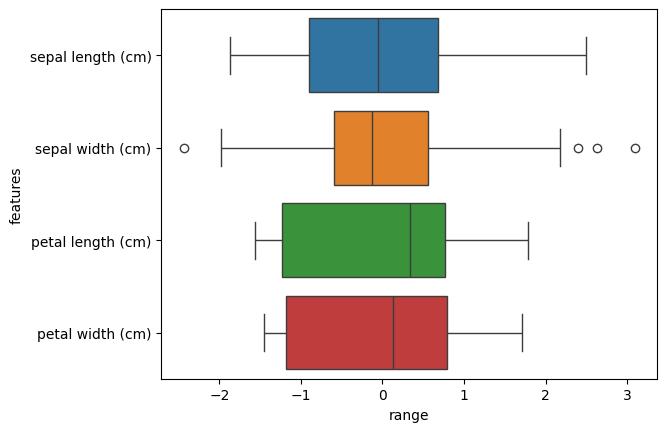

In [13]:

import seaborn as sns
sns.boxplot(data= df_scaled, orient='h').set(xlabel="range", ylabel= 'features')
plt.show()

In [14]:

def get_outliers_IQR(X):
    """
    Function to extract outliers using interquartile range (IQR) method.

    Args:
      X (numpy array): The column to find outliers in a dataframe.

    Returns:
      outliers (list): List of oulier (values)
      outlier_indices (list): List of corresponding indices of the outliers
    """
    q1 = np.quantile(X, 0.25) # finding the 1st quartile
    q3 = np.quantile(X, 0.75) #finding the 3rd quartile
    median = np.median(X)

    # find the iqr region
    iqr =q3-q1

    # find upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    #Calculate outliers
    outliers = X[(X <= lower_bound) | (X >= upper_bound)]
    outlier_indices = np.where((X <= lower_bound) | (X >= upper_bound))
    return outliers, outlier_indices[0].tolist()

In [15]:

df_copy = df_scaled.copy()
df.reset_index(drop=True, inplace=True)

#Calling the 'get_outlier function'
outliers, outlier_indices = get_outliers_IQR(df['sepal width (cm)'].to_numpy())
# Print the outliers and the corresponding indices
print('The outliers in the feature "sepal_width" are: ', outliers)
print('These are available on indexes: ', outlier_indices)

The outliers in the feature "sepal_width" are:  [4.4 4.1 4.2 2. ]
These are available on indexes:  [15, 32, 33, 60]


In [16]:
df_copy.drop(outlier_indices, inplace= True)
df_copy.reset_index(drop=True, inplace = True)
df_copy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
141,1.038005,-0.131979,0.819596,1.448832
142,0.553333,-1.282963,0.705921,0.922303
143,0.795669,-0.131979,0.819596,1.053935
144,0.432165,0.788808,0.933271,1.448832


In [17]:
df_copy.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,146.000000,146.000000,146.000000,146.000000
mean,0.016377,-0.038955,0.027765,0.027925
std,1.010653,0.915844,0.999226,0.999606
min,-1.870024,-1.973554,-1.567576,-1.447076
25%,-0.900681,-0.592373,-1.226552,-1.183812
50%,-0.052506,-0.131979,0.364896,0.132510
75%,0.674501,0.558611,0.762758,0.790671
max,2.492019,2.169988,1.785832,1.712096


In [19]:
df_copy.shape

(146, 4)

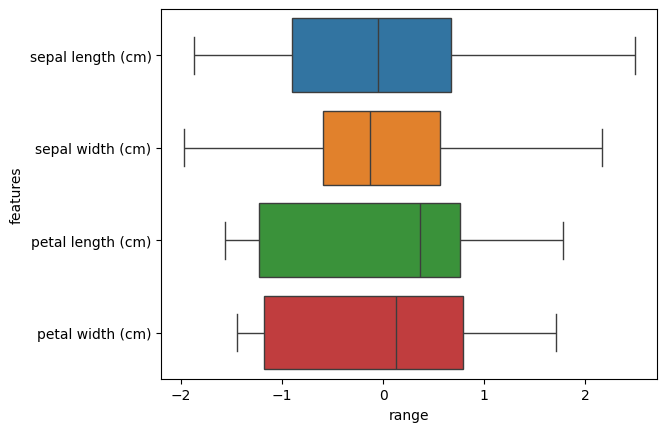

In [20]:

sns.boxplot(data=df_copy, orient="h").set(xlabel= 'range', ylabel='features')
plt.show()

In [22]:
corr_mat= df_copy.corr(method= 'pearson')
corr_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.123144,0.879362,0.822587
sepal width (cm),-0.123144,1.000000,-0.406141,-0.340602
petal length (cm),0.879362,-0.406141,1.000000,0.961866
petal width (cm),0.822587,-0.340602,0.961866,1.000000


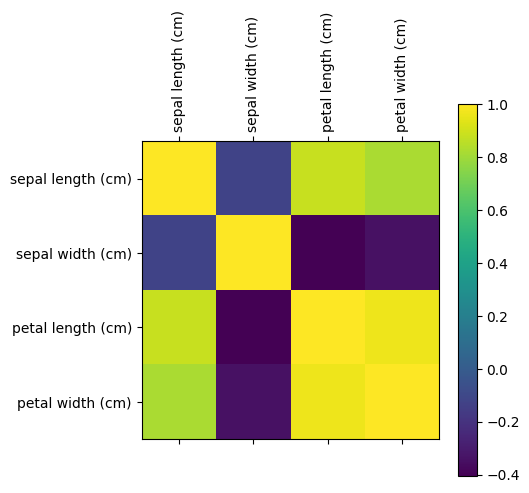

In [23]:

plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

In [26]:
from sklearn.decomposition import PCA

pca= PCA(n_components= 3)
df_pca= pca.fit_transform(df_copy)

In [27]:
from sklearn.mixture import GaussianMixture
n_clusters= 3
model_gmm= GaussianMixture(n_components= n_clusters, random_state= 42)
gmm_labels= model_gmm.fit_predict(df_pca)

In [28]:
from sklearn.metrics import silhouette_score
gmm_sil= silhouette_score(df_pca, gmm_labels)
print("Silhouette Score using GMM clustering after PCA is: ", gmm_sil)

Silhouette Score using GMM clustering after PCA is:  0.3681613987825642


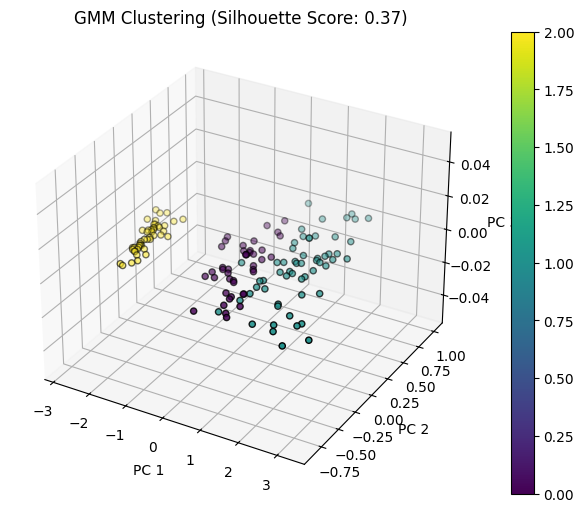

In [33]:
fig= plt.figure(figsize= (10,6))
ax= fig.add_subplot(111, projection= '3d')
scatter= ax.scatter(df_pca[:, 0], df_pca[:, 2], c=gmm_labels, cmap= 'viridis', marker= 'o', edgecolors= 'k')
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.title(f'GMM Clustering (Silhouette Score: { gmm_sil:.2f})')

colorbar= plt.colorbar(scatter)
plt.show()